In [1]:
#!pip install pandas

     ---------------------------------------- 10.4/10.4 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 8.6 MB/s eta 0:00:00
     -------------------------------------- 500.7/500.7 kB 5.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("powerconsumption.csv")

In [3]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
#изменение формата даты с object на datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [6]:
#Добавление  колонок - дата и время. сумма потребления электроэнергии
df['date'] = [d.date() for d in df['Datetime']]
df['time'] = [d.time() for d in df['Datetime']]
df['PC_Sum']=df["PowerConsumption_Zone1"]+df["PowerConsumption_Zone2"]+df["PowerConsumption_Zone3"]

In [8]:
df.head(3)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,date,time,PC_Sum
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00,67803.22193


In [39]:
df.groupby(['date']).sum(['PC_Sum'])

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PC_Sum
date,,,,,,,,,
2017-01-01,1393.243,9866.78,45.381,17480.271,3743.125,4.098993e+06,2.554242e+06,2.573107e+06,9.226342e+06
2017-01-02,1796.670,10289.71,11.025,17338.246,3920.747,4.157207e+06,2.816312e+06,2.566190e+06,9.539709e+06
2017-01-03,1742.400,10797.36,11.047,17378.786,4114.751,4.400992e+06,2.888247e+06,2.537396e+06,9.826635e+06
2017-01-04,1513.365,10866.21,11.868,17706.142,4151.120,4.419336e+06,2.894699e+06,2.545012e+06,9.859047e+06
2017-01-05,1564.768,10229.83,12.081,17099.980,4282.767,4.435619e+06,2.884888e+06,2.543641e+06,9.864148e+06
...,...,...,...,...,...,...,...,...,...
2017-12-26,1673.545,9946.21,11.961,15384.483,7309.496,4.321941e+06,3.565009e+06,1.640978e+06,9.527927e+06
2017-12-27,2193.540,8560.21,11.812,13808.257,6005.529,4.315243e+06,3.608277e+06,1.655752e+06,9.579272e+06
2017-12-28,1967.380,9048.87,11.715,16217.303,4350.148,4.358449e+06,3.540276e+06,1.608052e+06,9.506777e+06


In [10]:
#!pip install numpy==1.22

     ---------------------------------------- 14.7/14.7 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4


ERROR: Could not install packages due to an OSError: [WinError 5] \u041e\u0442\u043a\u0430\u0437\u0430\u043d\u043e \u0432 \u0434\u043e\u0441\u0442\u0443\u043f\u0435: 'C:\\Users\\ehedr\\OneDrive\\Documents\\Project\\VE\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Check the permissions.


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np

In [11]:
#!pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 415.6 kB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#!pip install pyod

     -------------------------------------- 137.2/137.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 298.0/298.0 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 164.1/164.1 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 1.9 MB/s eta 0:00:00
     -----------------------


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
dt = df.date.diff()

In [11]:
dt

0          NaT
1       0 days
2       0 days
3       0 days
4       0 days
         ...  
52411   0 days
52412   0 days
52413   0 days
52414   0 days
52415   0 days
Name: date, Length: 52416, dtype: timedelta64[ns]

In [12]:
dt.value_counts()

0 days    52052
1 days      363
Name: date, dtype: int64

In [13]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
date                      0
time                      0
PC_Sum                    0
dtype: int64

<AxesSubplot: xlabel='date', ylabel='PC_Sum'>

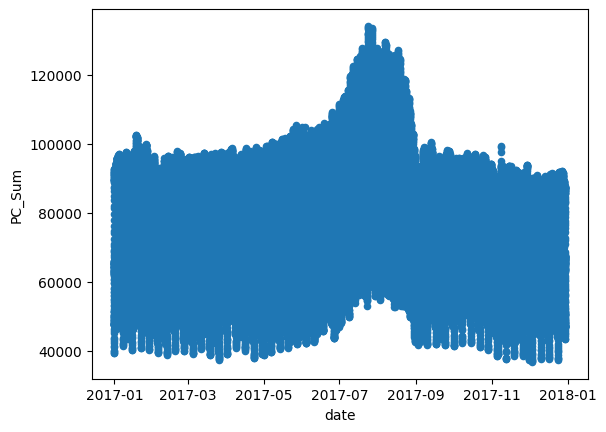

In [14]:
df.plot(kind = 'scatter', x = 'date', y ='PC_Sum')

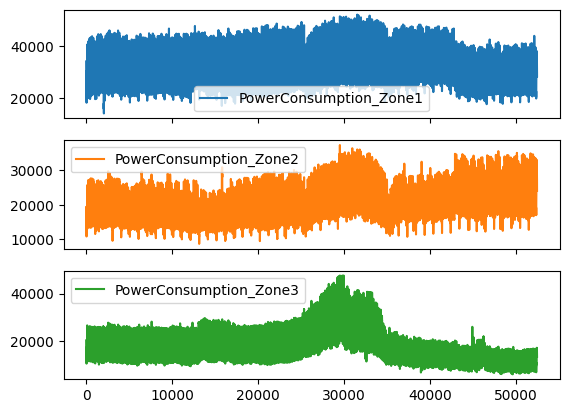

In [16]:
df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].plot(kind = 'line', subplots = True, layout=(3,1), sharex = True);

In [17]:
#выделяем таблицу с потреблением электроэнергии и температуры
df_date = ['date', 'Temperature', 'PC_Sum', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

In [18]:
df_date=df[df_date]
df_date.head(3)

,date,Temperature,PC_Sum,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01,6.559,70425.53544,34055.69620,16128.87538,20240.96386
1,2017-01-01,6.414,69320.84387,29814.68354,19375.07599,20131.08434
2,2017-01-01,6.313,67803.22193,29128.10127,19006.68693,19668.43373


In [19]:
#группируем по дате 
df_date_mean = df_date.groupby(['date']).mean()
df_date_mean.head(3)

,Temperature,PC_Sum,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
date,,,,,
2017-01-01,9.675299,64071.818534,28465.232067,17737.791287,17868.795181
2017-01-02,12.476875,66247.982154,28869.493671,19557.725431,17820.763053
2017-01-03,12.100000,68240.519974,30562.447257,20057.269504,17620.803213


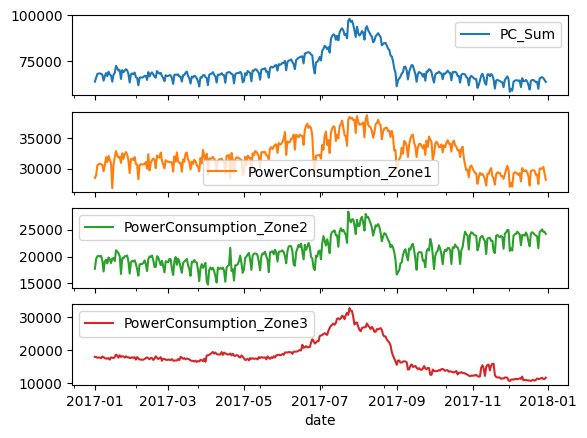

In [20]:
df_date_mean[['PC_Sum', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].plot(kind = 'line', subplots = True, layout=(4,1), sharex = True);

In [21]:
#выделяем таблицу с потреблением электроэнергии и температуры по времени
df_time = ['time', 'Temperature', 'PC_Sum', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

In [22]:
df_time=df[df_time]
df_time.head(3)

,time,Temperature,PC_Sum,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,00:00:00,6.559,70425.53544,34055.69620,16128.87538,20240.96386
1,00:10:00,6.414,69320.84387,29814.68354,19375.07599,20131.08434
2,00:20:00,6.313,67803.22193,29128.10127,19006.68693,19668.43373


In [23]:
#группируем по времени
df_time_mean = df_time.groupby(['time']).mean()
df_time_mean.head(3)

,Temperature,PC_Sum,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
time,,,,,
00:00:00,17.533596,71972.240884,31733.056212,20706.289359,19532.895312
00:10:00,17.476489,70511.825593,31078.068563,20280.415725,19153.341305
00:20:00,17.440890,69132.427428,30461.484045,19862.623410,18808.319973


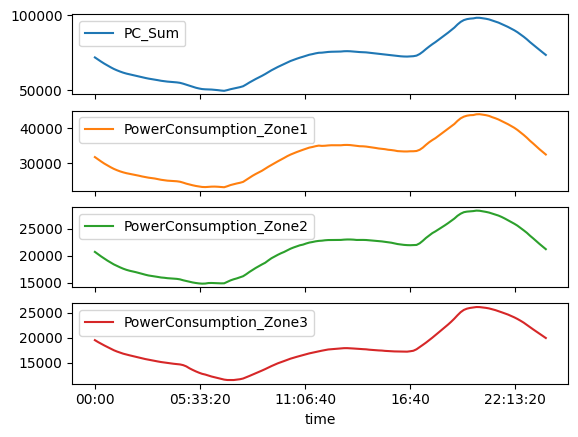

In [24]:
df_time_mean[['PC_Sum', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].plot(kind = 'line', subplots = True, layout=(4,1), sharex = True);

In [25]:
import matplotlib as plt
%matplotlib inline

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
def rolling_window(a: np.array, window_size):
    shape = a.shape[:-1] + (a.shape[-1] - window_size + 1, window_size)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [28]:
a = np.arange(0, 7)
a

array([0, 1, 2, 3, 4, 5, 6])

In [29]:
rolling_window(a, 3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [30]:
PC_Sum_date = df_date_mean.PC_Sum.to_numpy()

In [31]:
PC_Sum_date

array([64071.81853444, 66247.98215403, 68240.51997389, 68465.60300333,
       68501.02933653, 68333.08759479, 67851.07580701, 64591.64264139,
       67060.67857438, 68693.90099389, 67082.78061903, 69420.57296771,
       68043.39086222, 67339.45527576, 64024.1832616 , 67814.07248674,
       68867.17260201, 72609.60820757, 71286.08303021, 70052.11684111,
       70322.98147785, 65532.19624088, 70286.47999333, 69230.14156167,
       70020.93471312, 70822.31020222, 70212.45911438, 68166.22073146,
       63603.51139701, 68034.95380083, 68535.07762035, 68013.89543896,
       68968.39837431, 66439.33515167, 66107.86173563, 62099.0852675 ,
       66150.43002604, 66409.4080875 , 66235.59970097, 66555.59725972,
       67218.97485924, 67167.5208659 , 65010.05913188, 69262.05919688,
       66871.69040361, 68431.67562764, 69066.06802403, 67910.87025028,
       66821.63285389, 66202.54828625, 69795.15199333, 69004.00005778,
       68351.06884507, 68799.27340333, 67166.52309944, 66041.75532181,
      

In [72]:
#window_size = 7
window_size = 24

In [73]:
x = rolling_window(PC_Sum_date, window_size)

In [74]:
x

array([[64071.81853444, 66247.98215403, 68240.51997389, ...,
        65532.19624088, 70286.47999333, 69230.14156167],
       [66247.98215403, 68240.51997389, 68465.60300333, ...,
        70286.47999333, 69230.14156167, 70020.93471312],
       [68240.51997389, 68465.60300333, 68501.02933653, ...,
        69230.14156167, 70020.93471312, 70822.31020222],
       ...,
       [64623.0703449 , 64784.77648946, 64821.61224925, ...,
        66166.16148556, 66522.72355634, 66019.28255719],
       [64784.77648946, 64821.61224925, 64533.23397239, ...,
        66522.72355634, 66019.28255719, 64991.72226787],
       [64821.61224925, 64533.23397239, 64703.9651491 , ...,
        66019.28255719, 64991.72226787, 63917.7806466 ]])

In [35]:
scaler = StandardScaler()

In [36]:
z = scaler.fit_transform(x)

In [37]:
z.shape

(335, 30)

In [75]:
layers = [window_size, window_size//3, window_size//5 , window_size//3 , window_size]
layers

[24, 8, 4, 8, 24]

In [40]:
from pyod.models.auto_encoder import AutoEncoder

In [41]:
model = AutoEncoder(hidden_neurons = layers, epochs=200)

In [174]:
model 

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=200,
      hidden_activation='relu', hidden_neurons=[30, 10, 6, 10, 30],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000001C54DABDA20>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [42]:
#тренировка модели
model.fit(z)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                3

Epoch 139/200
10/10 [==============================] - 0s 12ms/step - loss: 1.0851 - val_loss: 0.9548
Epoch 140/200
10/10 [==============================] - 0s 12ms/step - loss: 1.0872 - val_loss: 0.9545
Epoch 141/200
10/10 [==============================] - 0s 13ms/step - loss: 1.0848 - val_loss: 0.9538
Epoch 142/200
10/10 [==============================] - 0s 14ms/step - loss: 1.0865 - val_loss: 0.9532
Epoch 143/200
10/10 [==============================] - 0s 12ms/step - loss: 1.0868 - val_loss: 0.9529
Epoch 144/200
10/10 [==============================] - 0s 14ms/step - loss: 1.0846 - val_loss: 0.9523
Epoch 145/200
10/10 [==============================] - 0s 14ms/step - loss: 1.0820 - val_loss: 0.9521
Epoch 146/200
10/10 [==============================] - 0s 13ms/step - loss: 1.0826 - val_loss: 0.9516
Epoch 147/200
10/10 [==============================] - 0s 14ms/step - loss: 1.0848 - val_loss: 0.9509
Epoch 148/200
10/10 [==============================] - 0s 14ms/step - loss: 1.0794

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=200,
      hidden_activation='relu', hidden_neurons=[30, 10, 6, 10, 30],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000027312ABF520>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [43]:
#история тренировки
history = pd.DataFrame(model.history_)

In [44]:
history 

,loss,val_loss
0,3.601296,2.790403
1,2.802302,2.450165
2,2.458378,2.281329
3,2.296872,2.174597
4,2.181121,2.099228
...,...,...
195,1.069283,0.932928
196,1.063943,0.932569
197,1.064361,0.932598
198,1.069091,0.932186


In [45]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epochs')

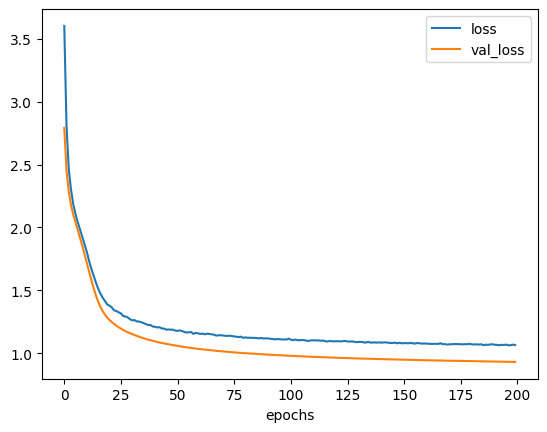

In [46]:
history.plot()
plt.xlabel('epochs')

In [47]:
z_scores = model.decision_scores_

In [48]:
z_scores = pd.DataFrame(z_scores)

In [49]:
z_scores

,0
0,2.989813
1,2.856198
2,2.807374
3,2.793827
4,2.838415
...,...
330,5.615234
331,5.593052
332,5.593979
333,5.629442


In [152]:
#выбор уровня за котормы отклонения считаются "аномальными"
#cut = 8
#cut = 14
cut = 4

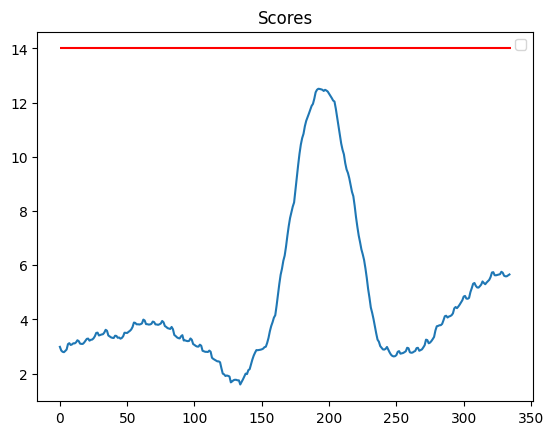

In [51]:
z_scores.plot()
plt.legend('')
plt.title('Scores')
plt.hlines(cut, 0, len(z_scores), color='red');

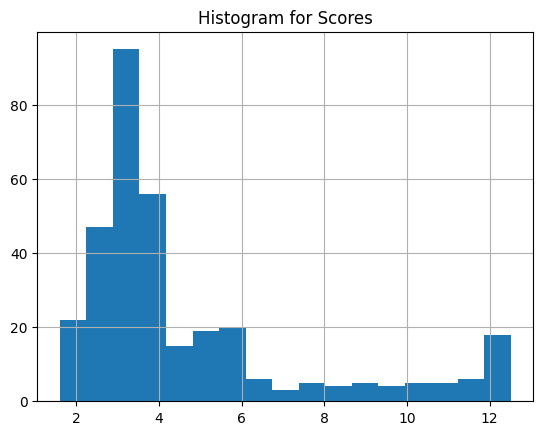

In [52]:
z_scores.hist(bins='auto')
plt.title("Histogram for Scores");

In [53]:
df_date_mean['anomaly_score'] = z_scores

In [54]:
#данные за пределом cut
da = df_date_mean[df_date_mean['anomaly_score'] > cut]

In [55]:
da

,Temperature,PC_Sum,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,anomaly_score
date,,,,,,


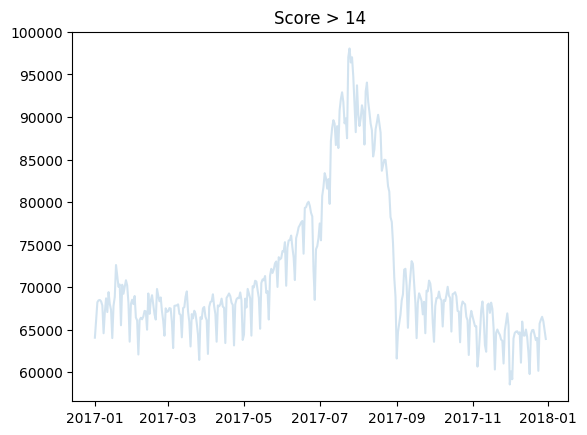

In [56]:
plt.plot(df_date_mean.index, df_date_mean.PC_Sum, alpha=0.2)
plt.scatter(da.index, da.PC_Sum, color="red", s= 8)
plt.title(f'Score > {cut}');

Модель по времени

In [76]:
PC_Sum_time = df_time_mean.PC_Sum.to_numpy()

In [77]:
PC_Sum_time

array([71972.24088374, 70511.82559261, 69132.42742799, 67803.09617918,
       66582.8116367 , 65396.78867923, 64285.05218979, 63358.39088782,
       62527.74238117, 61788.7011902 , 61170.80301699, 60677.81038174,
       60213.17324502, 59741.51124171, 59250.41030574, 58731.99185592,
       58258.93816007, 57827.62229513, 57498.14530254, 57199.35102863,
       56770.90636925, 56375.37961946, 56106.73052329, 55825.36600256,
       55649.65489327, 55453.44146715, 55296.03710795, 54993.21307625,
       54431.0859286 , 53748.74876855, 53010.19134544, 52325.85728032,
       51737.76648795, 51244.96977303, 50840.15171857, 50674.25343656,
       50626.77261337, 50513.11535207, 50351.40241713, 50121.76669491,
       49855.79134832, 49670.52593452, 50147.1423992 , 50734.81416946,
       51185.12152052, 51644.5084623 , 52118.8430723 , 52721.56763733,
       53925.79287351, 55226.67697674, 56412.21266623, 57558.709194  ,
       58620.23652355, 59696.73321044, 60862.35806076, 62158.70305298,
      

In [115]:
window_size = 6

In [131]:
layers = [window_size, window_size//3, window_size//5 , window_size//3 , window_size]
layers

[6, 2, 1, 2, 6]

In [132]:
x_time = rolling_window(PC_Sum_time, window_size)

In [133]:
x_time

array([[71972.24088374, 70511.82559261, 69132.42742799, 67803.09617918,
        66582.8116367 , 65396.78867923],
       [70511.82559261, 69132.42742799, 67803.09617918, 66582.8116367 ,
        65396.78867923, 64285.05218979],
       [69132.42742799, 67803.09617918, 66582.8116367 , 65396.78867923,
        64285.05218979, 63358.39088782],
       [67803.09617918, 66582.8116367 , 65396.78867923, 64285.05218979,
        63358.39088782, 62527.74238117],
       [66582.8116367 , 65396.78867923, 64285.05218979, 63358.39088782,
        62527.74238117, 61788.7011902 ],
       [65396.78867923, 64285.05218979, 63358.39088782, 62527.74238117,
        61788.7011902 , 61170.80301699],
       [64285.05218979, 63358.39088782, 62527.74238117, 61788.7011902 ,
        61170.80301699, 60677.81038174],
       [63358.39088782, 62527.74238117, 61788.7011902 , 61170.80301699,
        60677.81038174, 60213.17324502],
       [62527.74238117, 61788.7011902 , 61170.80301699, 60677.81038174,
        60213.17324502, 

In [134]:
z_time = scaler.fit_transform(x_time)

In [135]:
z_time

array([[ 6.70733402e-02, -3.93835132e-02, -1.39780520e-01,
        -2.36409928e-01, -3.25306005e-01, -4.11722878e-01],
       [-3.51547388e-02, -1.35790394e-01, -2.32594010e-01,
        -3.21565550e-01, -4.08063348e-01, -4.89318967e-01],
       [-1.31711674e-01, -2.28698072e-01, -3.17793893e-01,
        -4.04330281e-01, -4.85637190e-01, -5.53997327e-01],
       [-2.24763959e-01, -3.13984416e-01, -4.00601643e-01,
        -4.81911049e-01, -5.50297007e-01, -6.11974263e-01],
       [-3.10183049e-01, -3.96876200e-01, -4.78222735e-01,
        -5.46576638e-01, -6.08257321e-01, -6.63557266e-01],
       [-3.93203850e-01, -4.74576063e-01, -5.42921936e-01,
        -6.04542127e-01, -6.59825534e-01, -7.06684825e-01],
       [-4.71024650e-01, -5.39340921e-01, -6.00917553e-01,
        -6.56114944e-01, -7.02940729e-01, -7.41094328e-01],
       [-5.35890312e-01, -5.97395392e-01, -6.52517177e-01,
        -6.99233988e-01, -7.37340367e-01, -7.73524698e-01],
       [-5.94035144e-01, -6.49047380e-01, -6.956

In [136]:
z_time.shape

(139, 6)

In [137]:
layers_time = [window_size, window_size//2, window_size//6 , window_size//2 , window_size]
layers_time

[6, 3, 1, 3, 6]

In [138]:
model_time = AutoEncoder(hidden_neurons = layers_time, epochs=200)

In [139]:
model_time

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=200,
      hidden_activation='relu', hidden_neurons=[6, 3, 1, 3, 6],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000027312ABF520>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [140]:
#тренировка модели
model_time.fit(z_time)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 6)                 42        
                                                                 
 dropout_28 (Dropout)        (None, 6)                 0         
                                                                 
 dense_33 (Dense)            (None, 6)                 42        
                                                                 
 dropout_29 (Dropout)        (None, 6)                 0         
                                                                 
 dense_34 (Dense)            (None, 6)                 42        
                                                                 
 dropout_30 (Dropout)        (None, 6)                 0         
                                                                 
 dense_35 (Dense)            (None, 3)                

4/4 [==============================] - 0s 31ms/step - loss: 1.5335 - val_loss: 1.7732
Epoch 60/200
4/4 [==============================] - 0s 31ms/step - loss: 1.5248 - val_loss: 1.7667
Epoch 61/200
4/4 [==============================] - 0s 26ms/step - loss: 1.5187 - val_loss: 1.7605
Epoch 62/200
4/4 [==============================] - 0s 27ms/step - loss: 1.5137 - val_loss: 1.7544
Epoch 63/200
4/4 [==============================] - 0s 28ms/step - loss: 1.5211 - val_loss: 1.7483
Epoch 64/200
4/4 [==============================] - 0s 26ms/step - loss: 1.5057 - val_loss: 1.7424
Epoch 65/200
4/4 [==============================] - 0s 27ms/step - loss: 1.4919 - val_loss: 1.7365
Epoch 66/200
4/4 [==============================] - 0s 27ms/step - loss: 1.4951 - val_loss: 1.7306
Epoch 67/200
4/4 [==============================] - 0s 29ms/step - loss: 1.4817 - val_loss: 1.7248
Epoch 68/200
4/4 [==============================] - 0s 30ms/step - loss: 1.4853 - val_loss: 1.7192
Epoch 69/200
4/4 [=====

4/4 [==============================] - 0s 26ms/step - loss: 1.2463 - val_loss: 1.4774
Epoch 142/200
4/4 [==============================] - 0s 27ms/step - loss: 1.2452 - val_loss: 1.4755
Epoch 143/200
4/4 [==============================] - 0s 27ms/step - loss: 1.2424 - val_loss: 1.4736
Epoch 144/200
4/4 [==============================] - 0s 29ms/step - loss: 1.2413 - val_loss: 1.4718
Epoch 145/200
4/4 [==============================] - 0s 25ms/step - loss: 1.2383 - val_loss: 1.4700
Epoch 146/200
4/4 [==============================] - 0s 28ms/step - loss: 1.2369 - val_loss: 1.4683
Epoch 147/200
4/4 [==============================] - 0s 27ms/step - loss: 1.2354 - val_loss: 1.4665
Epoch 148/200
4/4 [==============================] - 0s 29ms/step - loss: 1.2340 - val_loss: 1.4648
Epoch 149/200
4/4 [==============================] - 0s 27ms/step - loss: 1.2321 - val_loss: 1.4630
Epoch 150/200
4/4 [==============================] - 0s 24ms/step - loss: 1.2303 - val_loss: 1.4612
Epoch 151/200


AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=200,
      hidden_activation='relu', hidden_neurons=[6, 3, 1, 3, 6],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000027312ABF520>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [141]:
#история тренировки
history_time = pd.DataFrame(model_time.history_)

In [142]:
history_time 

,loss,val_loss
0,2.567755,2.723950
1,2.404035,2.678092
2,2.507068,2.633705
3,2.337222,2.591856
4,2.398983,2.552013
...,...,...
195,1.168613,1.401365
196,1.167682,1.400386
197,1.166528,1.399443
198,1.165544,1.398500


Text(0.5, 0, 'epochs')

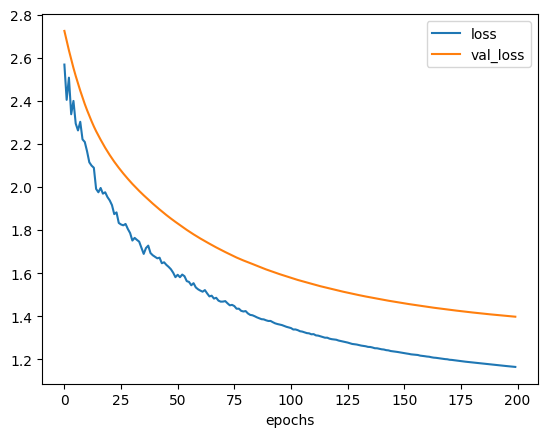

In [143]:
history_time.plot()
plt.xlabel('epochs')

In [144]:
z_scores_time = model_time.decision_scores_

In [145]:
z_scores_time = pd.DataFrame(z_scores_time)
z_scores_time

,0
0,1.319320
1,1.524399
2,1.717455
3,1.896991
4,2.061579
...,...
134,1.598569
135,1.335116
136,1.074050
137,0.825623


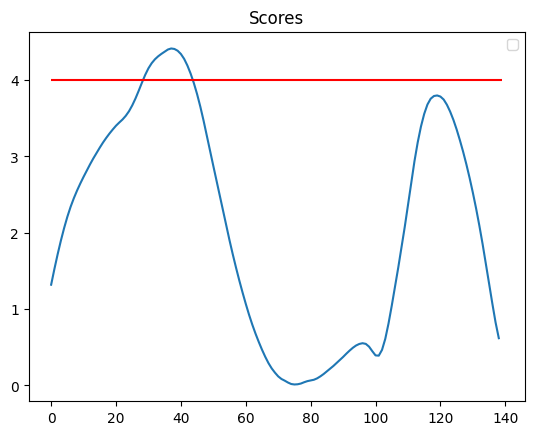

In [153]:
z_scores_time.plot()
plt.legend('')
plt.title('Scores')
plt.hlines(cut, 0, len(z_scores_time), color='red');

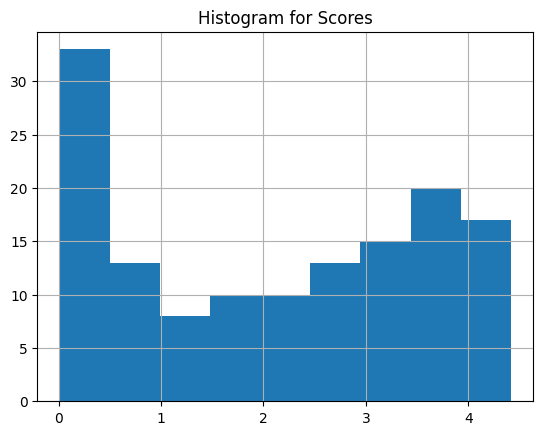

In [154]:
z_scores_time.hist(bins='auto')
plt.title("Histogram for Scores");

In [155]:
df_time_mean['anomaly_score'] = z_scores_time

In [186]:
#данные за пределом cut
da_time = df_time_mean[df_time_mean['anomaly_score'] > cut]

In [187]:
da_time

,Temperature,PC_Sum,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,anomaly_score
time,,,,,,


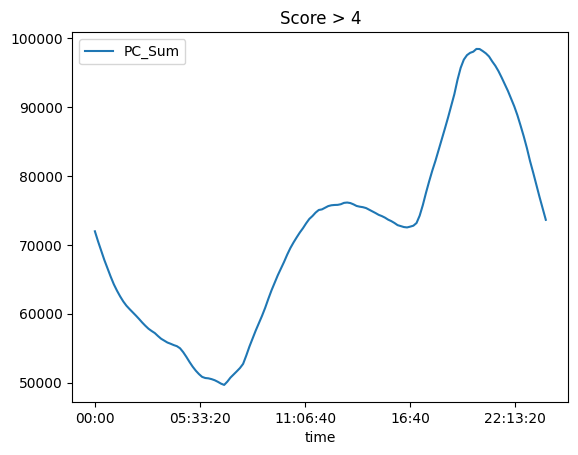

In [191]:
df_time_mean[['PC_Sum']].plot(kind = 'line')
plt.scatter(da_time.index, da_time.PC_Sum, color="red", s= 4)
plt.title(f'Score > {cut}');